<a href="https://colab.research.google.com/github/drcrajc/nanoelectronics/blob/main/dgfet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

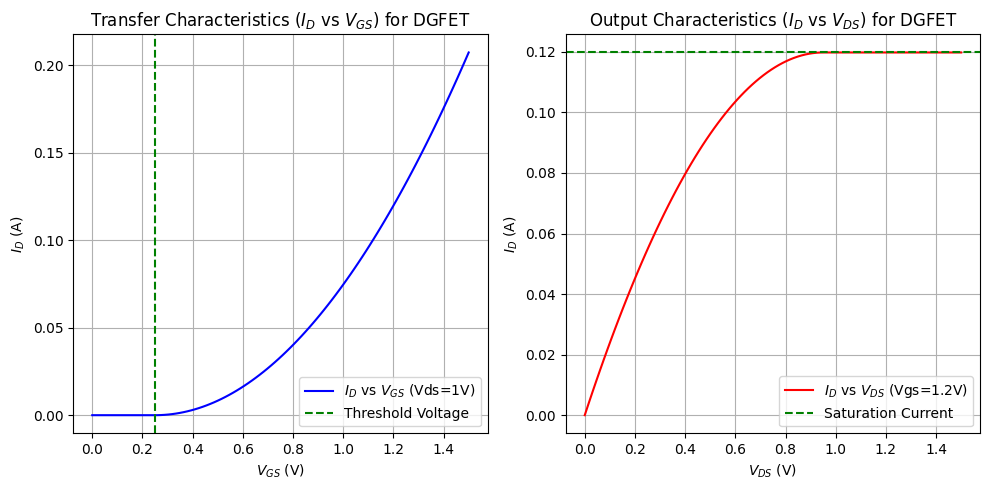

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
epsilon_0 = 8.85e-12  # Permittivity of free space (F/m)
kappa = 25  # Relative permittivity for high-k material (HfO2)
tox = 2e-9  # Oxide thickness (m)
mu_n = 600e-4  # Electron mobility (m^2/Vs)
W = 1e-6  # Channel width (m)
L = 50e-9  # Channel length (m)
Tsi = 10e-9  # Silicon channel thickness (m)
Vth = 0.25  # Threshold voltage (V)

# Gate capacitance for DGFET (with two gates)
Cox = 2 * ((epsilon_0 * kappa) / tox)  # Double the capacitance due to double gate

# Voltage ranges
Vgs = np.linspace(0, 1.5, 100)  # Gate-to-source voltage (V)
Vds = np.linspace(0, 1.5, 100)  # Drain-to-source voltage (V)

# Function to calculate Id vs Vgs (transfer characteristic) for DGFET
def Id_vs_Vgs(Vgs, Vds, Vth, mu_n, Cox, W, L):
    Id = np.zeros_like(Vgs)
    for i, Vg in enumerate(Vgs):
        if Vg > Vth:
            Id[i] = 0.5 * mu_n * Cox * (W/L) * (Vg - Vth)**2  # Saturation region
        else:
            Id[i] = 0  # Below threshold, current is negligible
    return Id

# Function to calculate Id vs Vds (output characteristic) for DGFET
def Id_vs_Vds(Vgs, Vds, Vth, mu_n, Cox, W, L):
    Id = np.zeros_like(Vds)
    for i, Vd in enumerate(Vds):
        if Vgs > Vth:
            if Vd < (Vgs - Vth):  # Triode region
                Id[i] = mu_n * Cox * (W/L) * ((Vgs - Vth) * Vd - 0.5 * Vd**2)
            else:  # Saturation region
                Id[i] = 0.5 * mu_n * Cox * (W/L) * (Vgs - Vth)**2
        else:
            Id[i] = 0  # Below threshold
    return Id

# Calculate Id for different Vgs and Vds
Id_vgs = Id_vs_Vgs(Vgs, 1.0, Vth, mu_n, Cox, W, L)  # For Vds = 1V
Id_vds = Id_vs_Vds(1.2, Vds, Vth, mu_n, Cox, W, L)  # For Vgs = 1.2V

# Plot Id vs Vgs (Transfer characteristic)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(Vgs, Id_vgs, label='$I_D$ vs $V_{GS}$ (Vds=1V)', color='b')
plt.axvline(x=Vth, color='g', linestyle='--', label='Threshold Voltage')
plt.title('Transfer Characteristics ($I_D$ vs $V_{GS}$) for DGFET')
plt.xlabel('$V_{GS}$ (V)')
plt.ylabel('$I_D$ (A)')
plt.legend()
plt.grid(True)

# Plot Id vs Vds (Output characteristic)
plt.subplot(1, 2, 2)
plt.plot(Vds, Id_vds, label='$I_D$ vs $V_{DS}$ (Vgs=1.2V)', color='r')
plt.axhline(y=max(Id_vds), color='g', linestyle='--', label='Saturation Current')
plt.title('Output Characteristics ($I_D$ vs $V_{DS}$) for DGFET')
plt.xlabel('$V_{DS}$ (V)')
plt.ylabel('$I_D$ (A)')
plt.legend()
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()
